# Importing Libraries

In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

CPU times: total: 5.17 s
Wall time: 40.4 s


# data Gathering

In [2]:
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
x= df.drop('Outcome',axis=1)
y= df.Outcome

In [6]:
pip install imbalanced-learn

In [7]:
!pip install imbalanced-learn

Unable to create process using 'C:\Users\sagar dhage\anaconda\python.exe "C:\Users\sagar dhage\anaconda\Scripts\pip-script.py" install imbalanced-learn'


In [8]:
# pip install -U imbalanced-learn

In [9]:
!pip install scikit-learn==0.18.2 


Unable to create process using 'C:\Users\sagar dhage\anaconda\python.exe "C:\Users\sagar dhage\anaconda\Scripts\pip-script.py" install scikit-learn==0.18.2'


In [10]:
pip install sklearn

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)

In [12]:
import imblearn
from imblearn.over_sampling import SMOTE

# over = SMOTE(sampling_strategy=0.1)
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)



In [13]:
x.shape

(1000, 8)

In [14]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

## Creating a Decision model

In [16]:
Decision_model=DecisionTreeClassifier()
Decision_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
#testing prediction of y
y_pred=Decision_model.predict(x_test)

In [18]:
#training prediction of y
y_pred_train=Decision_model.predict(x_train)

In [19]:
(accuracy_score(y_test,y_pred))*100

76.5

In [20]:
(accuracy_score(y_train,y_pred_train))*100

100.0

In [21]:
confusion_matrix(y_test,y_pred)

array([[70, 23],
       [24, 83]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75        93
           1       0.78      0.78      0.78       107

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.77      0.77       200



In [23]:
plt.figure(figsize=(200,200))
tree=plot_tree(decision_tree=Decision_model,
               feature_names=df.columns,
               class_names=['0','1'],filled=True)
print('Decision Tree')
# display(tree)
# plt.show(tree)
plt.savefig('Decision Tree.png')

Decision Tree


In [24]:
DT_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
DT_model.fit(x_train,y_train)
y_pred_tuned=DT_model.predict(x_test)
accuracy_score(y_test,y_pred_tuned)

0.76

In [25]:
y_pred_tuned_train=DT_model.predict(x_train)
accuracy_score(y_train,y_pred_tuned_train)

0.7925

## Grid search cv

In [26]:
DT_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [27]:
DT_model=DecisionTreeClassifier()

In [28]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
gscv_dt_model=GridSearchCV(DT_model,hyperparameters,cv=3)
gscv_dt_model

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [29]:
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [30]:
gscv_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 23,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [31]:
y_pred_gscv=gscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred_gscv)

0.77

In [32]:
y_pred_train_gscv=gscv_dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train_gscv)

0.95625

### Randomized searchcv

In [33]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,100),
                  'min_samples_leaf':np.arange(2,20),
                  'min_samples_split':np.arange(2,10)}
rscv_dt_model=RandomizedSearchCV(DT_model,hyperparameters)
rscv_dt_model

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [34]:
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [35]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=97, min_samples_leaf=9,
                       min_samples_split=4)

In [36]:
y_pred1=rscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred1)

0.755

## Prunning 

In [ ]:
# cutting the tree from down to reduce overfitting
# in copmparison to setting max depth parameter, in purunnning the tree is allowed to grow completly & then based on the lowest SSR + penalty (alpha * T) the depth of the tree is chosen or to that level tree is prunned from bottom.
# It removes the weak nodes.

In [ ]:
# where,
# alpha >> ccp_alpha >> cost complexity prunning

In [37]:
Decision_model

DecisionTreeClassifier()

In [38]:
values=Decision_model.cost_complexity_pruning_path(x_train,y_train)
print(values)
ccp_alpha_list=values['ccp_alphas']
ccp_alpha_list

{'ccp_alphas': array([0.        , 0.00082251, 0.001     , 0.00104167, 0.00107143,
       0.00111111, 0.00122449, 0.00133333, 0.0014881 , 0.00166667,
       0.00166667, 0.00177778, 0.00181818, 0.001875  , 0.001875  ,
       0.001875  , 0.001875  , 0.00192161, 0.00196429, 0.002     ,
       0.00208333, 0.00208333, 0.00208333, 0.00214286, 0.00215278,
       0.00216721, 0.0021875 , 0.00222222, 0.00222908, 0.00223776,
       0.0022807 , 0.00230681, 0.00232143, 0.00242647, 0.00242857,
       0.0025    , 0.00254902, 0.00260417, 0.00294643, 0.00306166,
       0.00311614, 0.00321429, 0.00354346, 0.00357143, 0.00369353,
       0.00396425, 0.00400948, 0.00409091, 0.00414943, 0.00429688,
       0.00439565, 0.00450149, 0.00453386, 0.00502649, 0.00515153,
       0.00542564, 0.00543115, 0.00556111, 0.00580019, 0.00583681,
       0.00697872, 0.01236002, 0.01583793, 0.02215367, 0.03503823,
       0.08873801]), 'impurities': array([0.        , 0.00246753, 0.00446753, 0.00655087, 0.00869372,
       0.010

array([0.        , 0.00082251, 0.001     , 0.00104167, 0.00107143,
       0.00111111, 0.00122449, 0.00133333, 0.0014881 , 0.00166667,
       0.00166667, 0.00177778, 0.00181818, 0.001875  , 0.001875  ,
       0.001875  , 0.001875  , 0.00192161, 0.00196429, 0.002     ,
       0.00208333, 0.00208333, 0.00208333, 0.00214286, 0.00215278,
       0.00216721, 0.0021875 , 0.00222222, 0.00222908, 0.00223776,
       0.0022807 , 0.00230681, 0.00232143, 0.00242647, 0.00242857,
       0.0025    , 0.00254902, 0.00260417, 0.00294643, 0.00306166,
       0.00311614, 0.00321429, 0.00354346, 0.00357143, 0.00369353,
       0.00396425, 0.00400948, 0.00409091, 0.00414943, 0.00429688,
       0.00439565, 0.00450149, 0.00453386, 0.00502649, 0.00515153,
       0.00542564, 0.00543115, 0.00556111, 0.00580019, 0.00583681,
       0.00697872, 0.01236002, 0.01583793, 0.02215367, 0.03503823,
       0.08873801])

In [39]:
train_accuracy=[]
test_accuracy=[]

for ccp_alpha in ccp_alpha_list:
    DT_ml_model= DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    DT_ml_model.fit(x_train,y_train)
    train_accuracy.append(DT_ml_model.score(x_train,y_train))
    test_accuracy.append(DT_ml_model.score(x_test,y_test))

In [40]:
##testing accuracy for selected alpha value
max(test_accuracy)

0.805

In [41]:
len(test_accuracy)

66

In [42]:
test_accuracy.index(max(test_accuracy))

44

In [43]:
#alpha value
ccp_alpha_list[7]

0.0013333333333333335

In [44]:
##traing accuracy for sselected alpha value
train_accuracy[7]

0.99125

<Figure size 2160x1440 with 0 Axes>

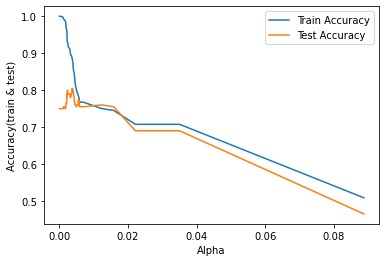

In [45]:
plt.figure(figsize=(30,20))
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy,label='Train Accuracy')
ax.plot(ccp_alpha_list,test_accuracy,label='Test Accuracy')
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy(train & test)')
ax.legend()


In [46]:
Decision_model=DecisionTreeClassifier(random_state=12,ccp_alpha=0.006005958291956326)
Decision_model.fit(x_train,y_train)
Decision_model.score(x_train,y_train),Decision_model.score(x_test,y_test)

(0.7675, 0.755)